### Import the libraries

In [60]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

### Import the dataset

In [4]:
data = pd.read_excel("Iris Flower.xlsx")

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Delete the Id column

In [6]:
data = data.drop('Id', axis = 1)

In [7]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Display Stats about the data

In [8]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Count the no. of samples for each species

In [10]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### Check for null values

In [11]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### EDA

<Axes: >

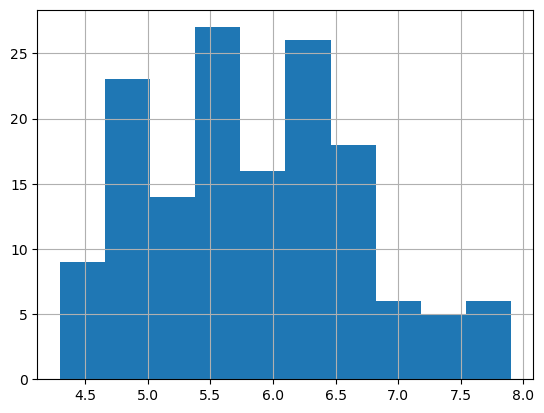

In [12]:
data['SepalLengthCm'].hist()

<Axes: >

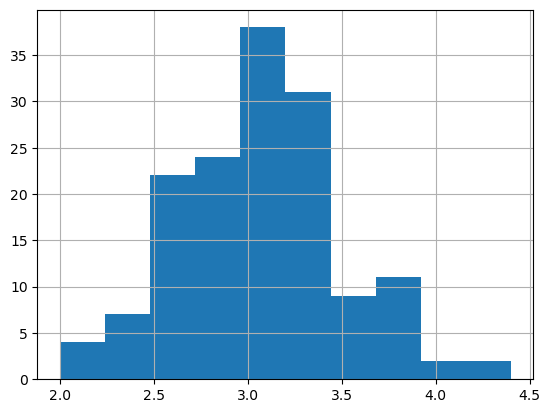

In [13]:
data['SepalWidthCm'].hist()

<Axes: >

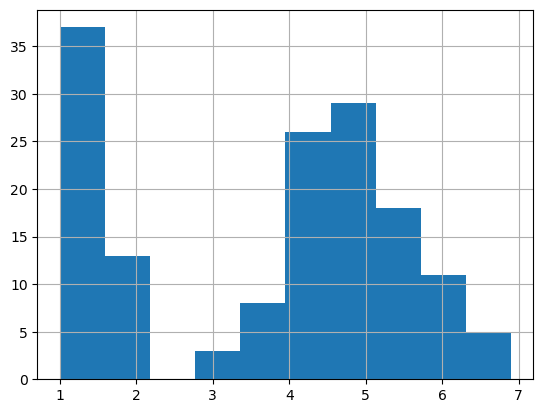

In [14]:
data['PetalLengthCm'].hist()

<Axes: >

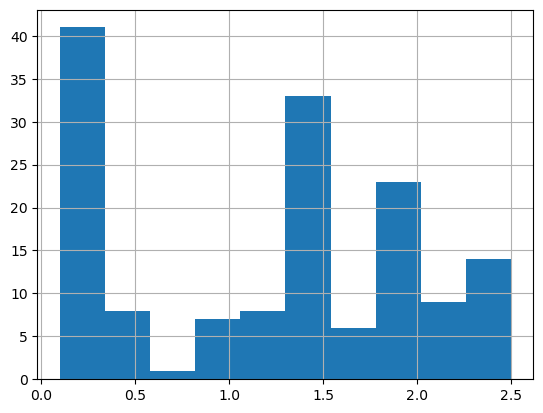

In [15]:
data['PetalWidthCm'].hist()

In [17]:
colors = ['red', 'green', 'blue']

species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

Text(0, 0.5, 'Sepal Width')

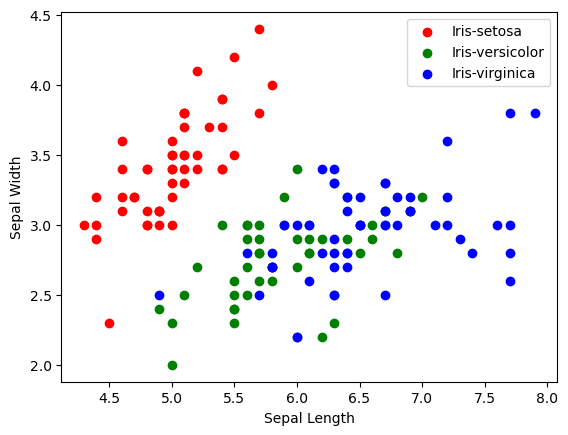

In [20]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], color = colors[i], label = species[i])

plt.legend()

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

Text(0, 0.5, 'Petal Width')

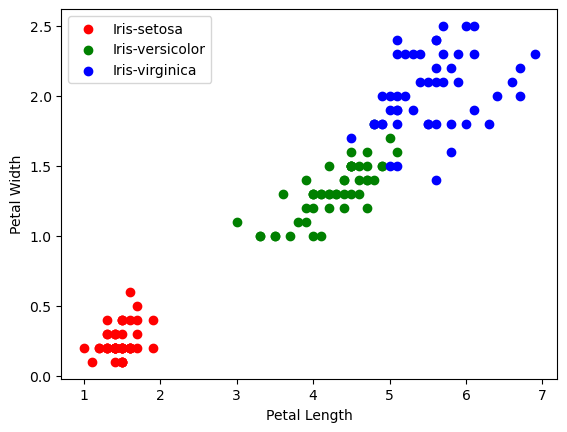

In [21]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], color = colors[i], label = species[i])

plt.legend()

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

Text(0, 0.5, 'Petal Length')

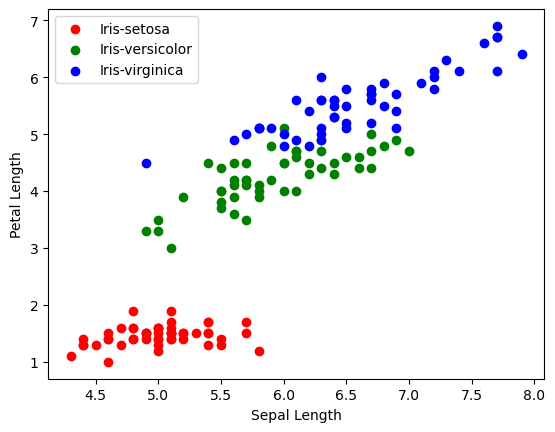

In [22]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['PetalLengthCm'], color = colors[i], label = species[i])

plt.legend()

plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')

Text(0, 0.5, 'Petal Width')

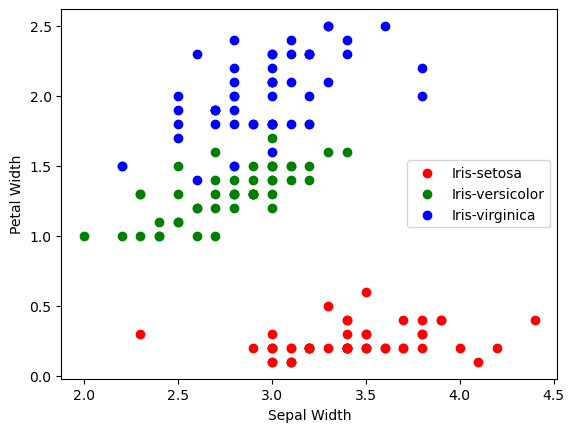

In [23]:
for i in range(3):
    x = data[data['Species'] == species[i]]
    plt.scatter(x['SepalWidthCm'], x['PetalWidthCm'], color = colors[i], label = species[i])

plt.legend()

plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')

### Correlation Matrix

In [25]:
data.corr(numeric_only = True)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

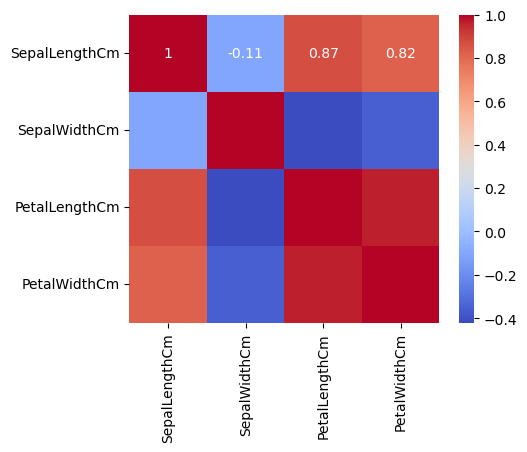

In [29]:
corr = data.corr(numeric_only = True)
fig, ax = plt.subplots(figsize = (5,4))
sns.heatmap(corr, annot = True, ax = ax, cmap = 'coolwarm')

### Label Encoder

In [31]:
le = LabelEncoder()

In [32]:
data['Species'] = le.fit_transform(data['Species'])

In [33]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Training the Model

In [55]:
x = data.drop(columns = ['Species'])
y = data['Species']

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70)

### Logistic Regression

In [76]:
model = LogisticRegression()

In [77]:
model.fit(x_train, y_train)

C:\Users\Home\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
print(f"Accuracy: {model.score(x_test, y_test)}")

Accuracy: 0.9777777777777777


### KNN

In [48]:
model = KNeighborsClassifier()

In [49]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [50]:
print(f"Accuracy: {model.score(x_test, y_test)}")

Accuracy: 0.9777777777777777


### Decision Tree

In [61]:
model = DecisionTreeClassifier()

In [62]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [63]:
print(f'Accuracy: {model.score(x_test, y_test)}')

Accuracy: 0.9777777777777777


### Prediction of Species

In [75]:
input_data = np.array([[5.3, 2.5, 4.6, 1.9]])

prediction = model.predict(input_data)

if prediction == 0:
    print('Iris-Setosa')
elif prediction == 1:
    print('Iris-Versicolor')
else:
    print('Iris-Virginica')


Iris-Virginica


C:\Users\Home\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
